# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids[:2])

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etiquetas de los clusters: [3 3 1 4 0 4 1 1 3 3 4 1 1 3 4 1 1 3 4 5 0 0 3 3 5 5 1 1 5 3 1 4 3 1 3 5 5
 3 3 0 5 3 3 0 5 3 3 3 3 1 3 1 1 1 3 3 3 1 1 2 0 2 6 7 7 0 2 2 0 0 5 7 2 3
 5 2 7 2 0 2 7 0 6 2 2 2 2 6 0 6 2 2 2 7 7 5 6 2 0 7 0 6 2 7 0 7 2 2 7 0 6
 7 6 2 7 7 2 7 7 6 6 2 7 7 7 7 7 2 7 6 6 2 6 6 6 0 0 2 6 6 6 0 2 6 5 5 7 6
 6 6 2 2 2 0 6 0 2 5 0 6 2 0 6 0 6 2 0 0 0 6 2 2 0 0 0 5 5 6]
Centroides: [[1.29973333e+01 2.66200000e+00 2.36400000e+00 1.93300000e+01
  1.02433333e+02 2.10966667e+00 1.57433333e+00 4.02666667e-01
  1.53900000e+00 5.82466667e+00 8.98666667e-01 2.34600000e+00
  7.10233333e+02]
 [1.37623529e+01 1.78058824e+00 2.54058824e+00 1.73588235e+01
  1.05411765e+02 2.83294118e+00 2.97588235e+00 3.08235294e-01
  1.82352941e+00 5.91647059e+00 1.09529412e+00 3.03823529e+00
  1.27088235e+03]]


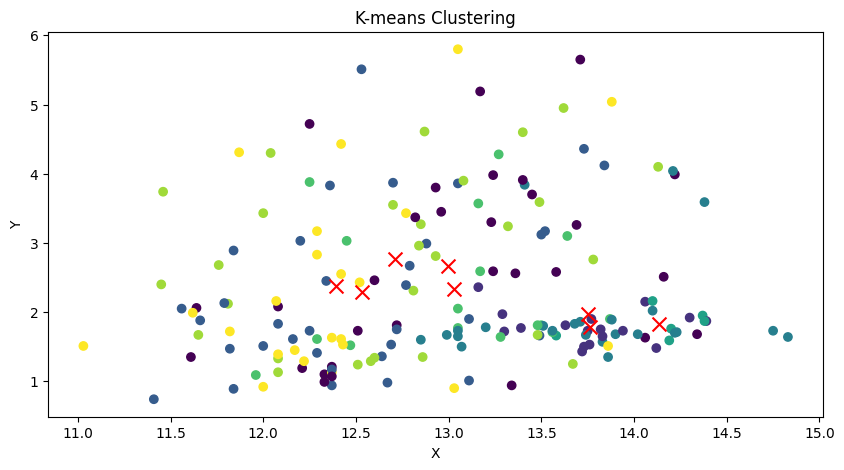

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')

plt.show()

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters=5)
data = kmeans.fit(X)

labels = data.labels_

centroids = kmeans.cluster_centers_

print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids[:2])

Etiquetas de los clusters: [2 2 2 0 4 0 0 0 2 2 0 0 0 2 0 0 0 2 0 4 4 4 2 2 4 4 2 0 4 2 0 0 2 0 2 4 4
 2 2 4 4 2 2 1 4 2 2 2 2 0 2 0 2 0 2 2 2 0 0 3 1 3 1 3 3 1 3 3 4 1 4 3 3 2
 4 3 3 3 4 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 4 1 3 1 3 1 1 3 3 1 3 3 3 3 1 1
 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 4 3 1 4 4 3 1
 1 1 3 3 3 1 1 1 3 4 1 1 3 1 1 1 1 3 1 1 4 1 3 3 1 4 4 4 4 1]
Centroides: [[1.39205000e+01 1.76900000e+00 2.49750000e+00 1.72000000e+01
  1.06650000e+02 2.90800000e+00 3.08150000e+00 2.95500000e-01
  1.90850000e+00 6.32250000e+00 1.11700000e+00 3.00850000e+00
  1.36085000e+03]
 [1.27416667e+01 2.68354167e+00 2.36416667e+00 2.06125000e+01
  9.71250000e+01 1.96687500e+00 1.32833333e+00 4.12916667e-01
  1.38562500e+00 5.54187500e+00 8.64583333e-01 2.18875000e+00
  6.36125000e+02]]


C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


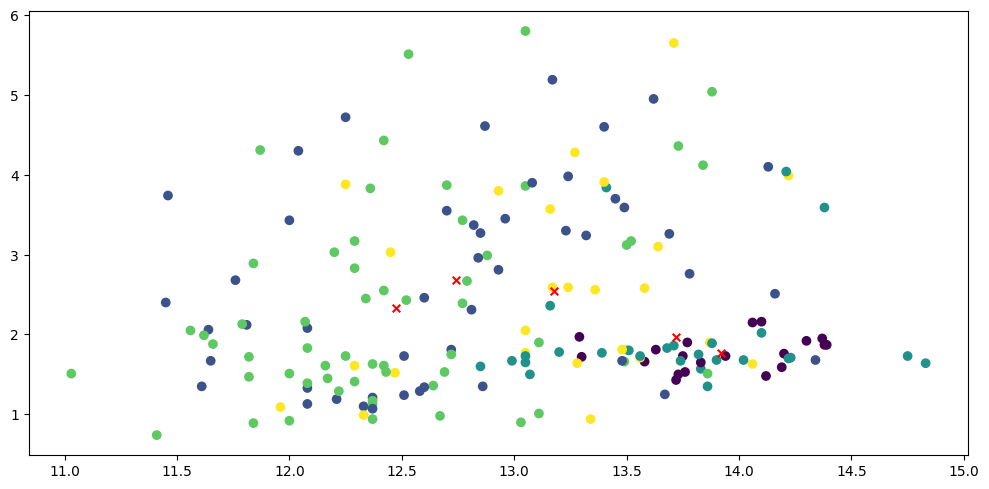

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids[:2])

Etiquetas de los clusters: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]
Centroides: [[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

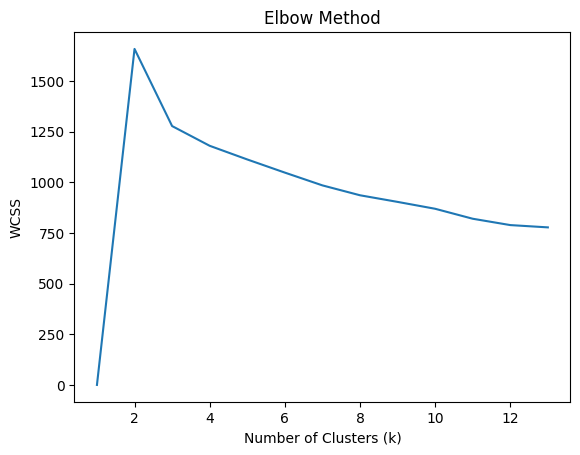

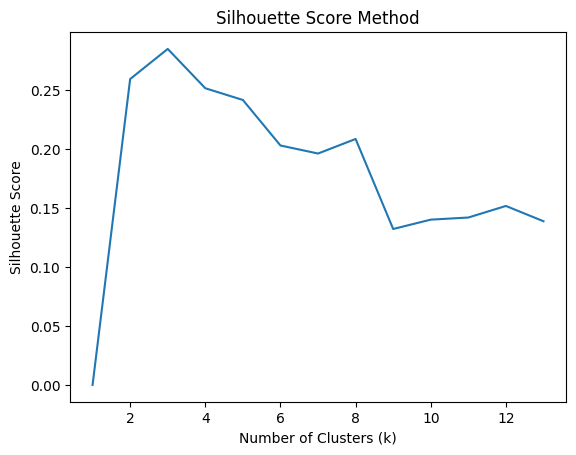

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
silhouette_scores = []

for k in range(1, 14):
    if k == 1:
        labels = np.zeros(len(X_scaled))
        wcss.append(0)
        silhouette_scores.append(0)
    else:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Elbow Method
plt.plot(range(1, 14), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
plt.plot(range(1, 14), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

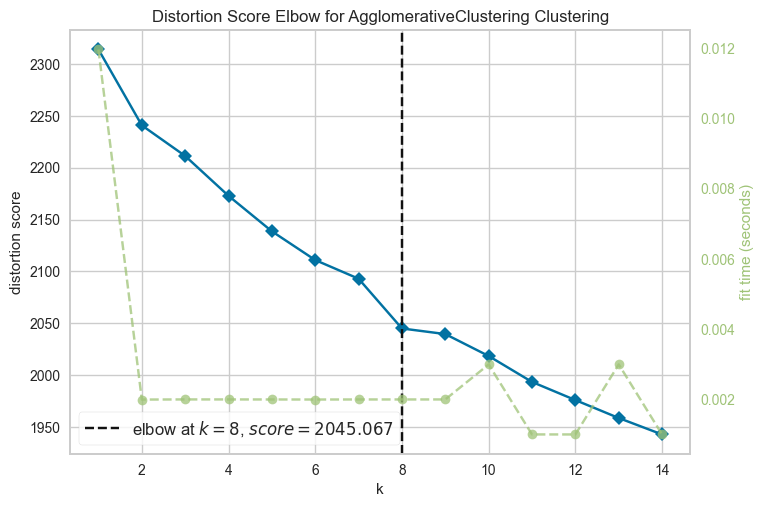

In [21]:
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')


visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X_scaled)

visual.poof();

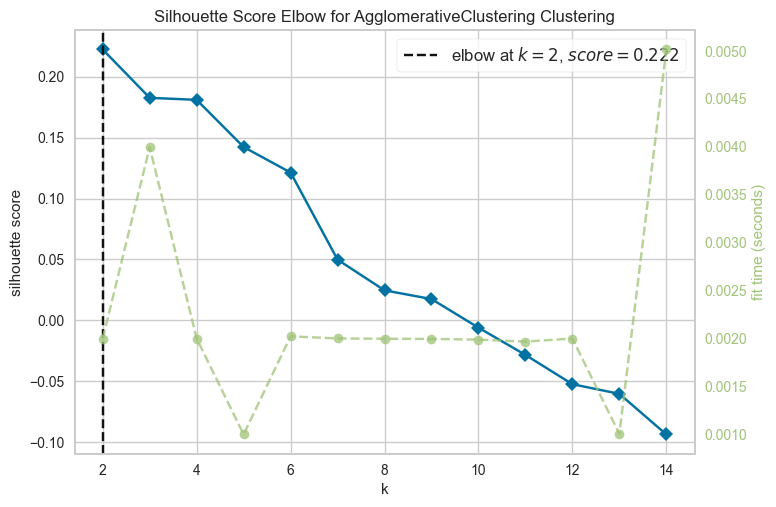

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')


visual=KElbowVisualizer(modelo, k=(2, 15), metric = 'silhouette')

visual.fit(X_scaled)

visual.poof()

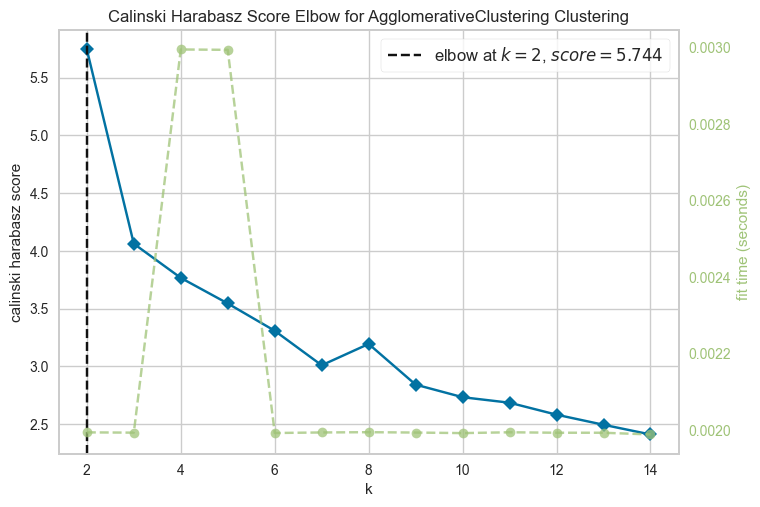

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')


visual=KElbowVisualizer(modelo, k=(2, 15), metric = 'calinski_harabasz')

visual.fit(X_scaled)

visual.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <Axes: xlabel='magnesium', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>,
        <Axes: xlabel='flavanoids', ylabel='alcohol'>,
        <Axes: xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <Axes: xlabel='proanthocyanins', ylabel='alcohol'>,
        <Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='hue', ylabel='alcohol'>,
        <Axes: xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <Axes: xlabel='proline', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>,
        <Axes: xlabel='ash', ylabel='malic_acid'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='malic_acid'>,
        <Axes: xlabel='magne

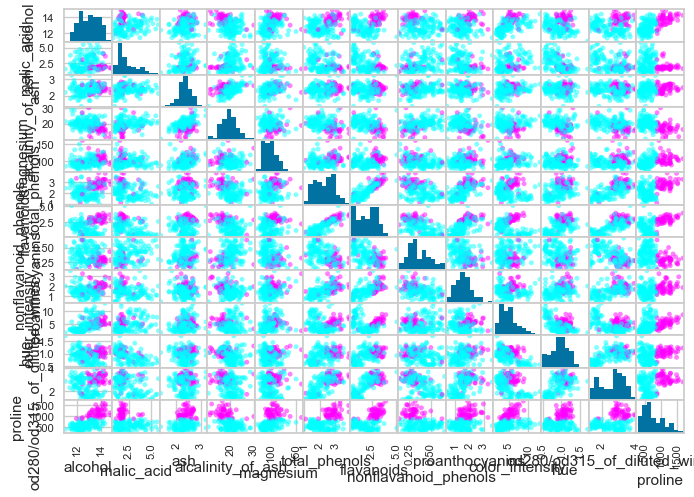

In [24]:
kmeans=KMeans(n_clusters=2)
pred = kmeans.fit(X).labels_
pd.plotting.scatter_matrix(X, c=pred, cmap='cool')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [28]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2).fit(X)

pca_x=pca.fit_transform(X)

df= pd.DataFrame(pca_x)
df.columns= ['col1','col2']

df.head()


,col1,col2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


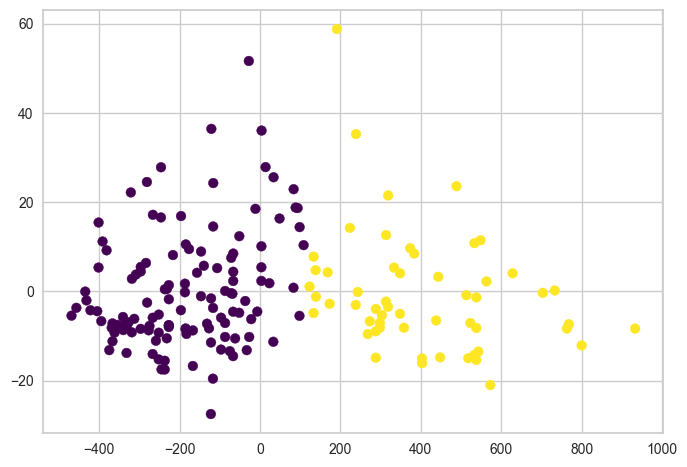

In [29]:
kmeans=KMeans(n_clusters=2)

clusters = kmeans.fit(df)

plt.scatter(df.col1,   # x
            df.col2,   # y
            c=clusters.labels_,cmap='viridis'); 

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

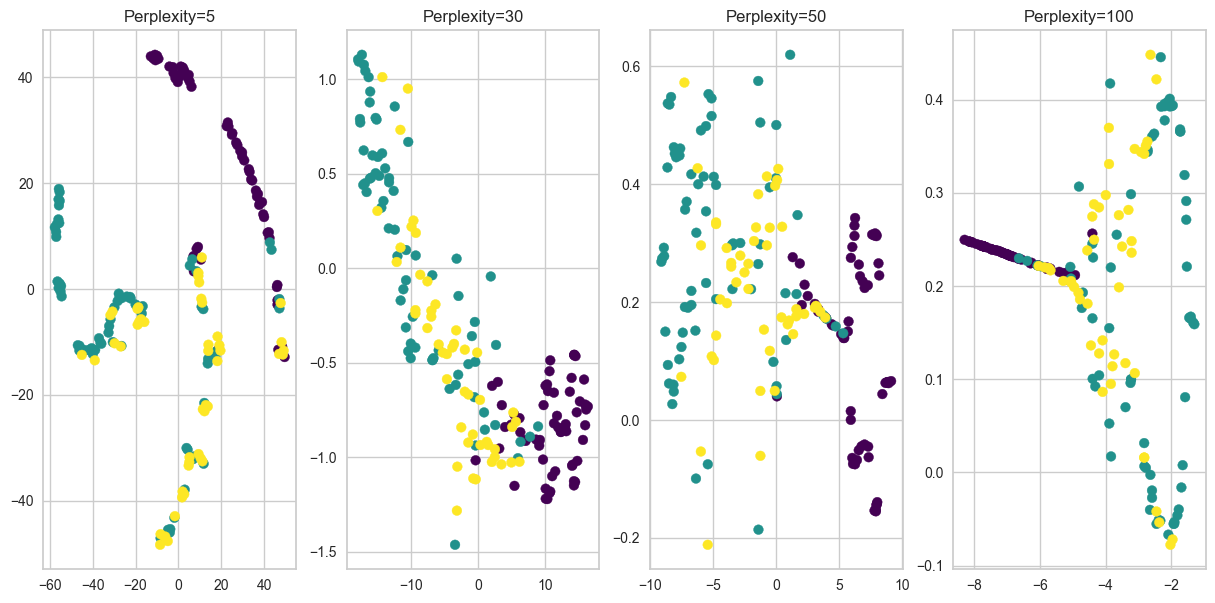

In [31]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='viridis')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show()